In [1]:
import numpy as np 
import pandas as pd  

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.shape

(42000, 785)

In [5]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.shape

(28000, 784)

In [7]:
train_df.label.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [8]:
digits = train_df.drop(['label'], axis=1).values
digits = digits / 255.
label = train_df['label'].values

digits.max()

1.0

In [9]:
label.max()

9

In [12]:
digits

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
digits.shape

(42000, 784)

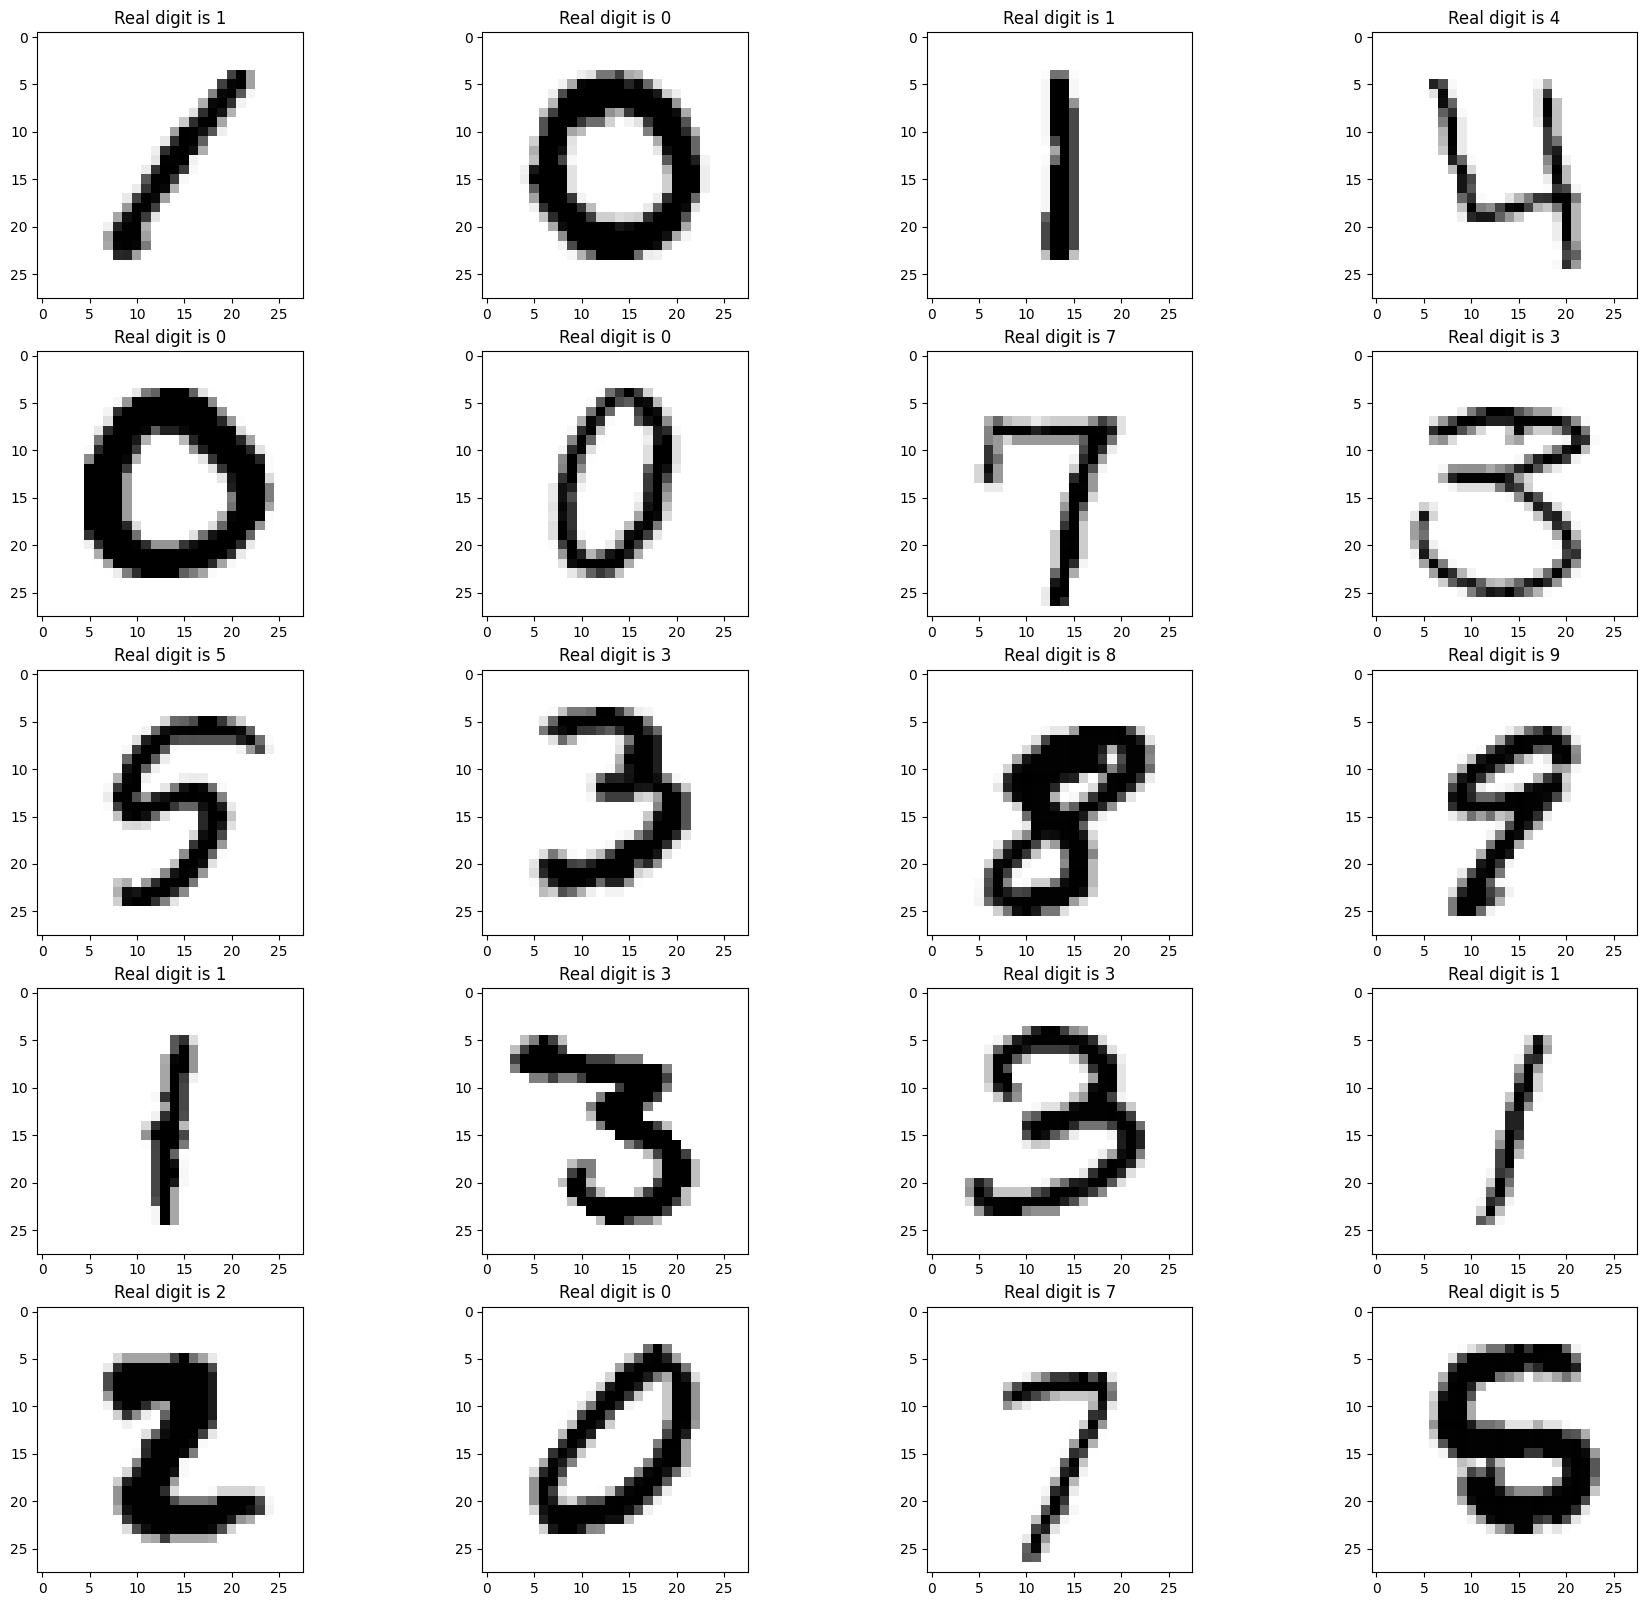

In [14]:
fig, axis = plt.subplots(5, 4, figsize=(22, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(digits[i].reshape(28, 28), cmap='binary')
    ax.set(title = "Real digit is {}".format(label[i]))

## Model

In [16]:
from sklearn.model_selection import train_test_split
 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

In [17]:
X = digits
y = label
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [18]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [19]:
y_pred = model.predict(X_test)  
rf_acc = accuracy_score(y_test, y_pred)

print("Model accuracy is: {0:.3f}%".format(rf_acc * 100))

Model accuracy is: 94.238%


In [21]:
print("Accuracy: {}%".format(accuracy_score(y_test, y_pred )*100))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y_test, y_pred )))

Accuracy: 94.23809523809524%
Confusion Matrix:
[[401   0   0   0   1   0   3   0   3   0]
 [  0 465   3   1   0   0   1   1   0   0]
 [  2   3 396   1  10   1   1   2   4   0]
 [  1   4   7 461   1   8   0   6   6  12]
 [  0   0   0   0 371   1   4   3   2  16]
 [  1   1   1   8   0 318   3   1   3   3]
 [  3   1   1   0   2   2 389   1   3   0]
 [  0   7   5   1   5   0   0 406   1  13]
 [  1   6   2   8   3   4   2   2 368   7]
 [  1   0   5  10   3   3   0   7   4 383]]


In [23]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([408, 471, 420, 506, 397, 339, 402, 438, 403, 416], dtype=int64))

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10,20, 50, 100],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}
random_forest_classifier = RandomForestClassifier()



In [28]:
grid = GridSearchCV(random_forest_classifier, param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50, 100],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             verbose=5)

In [29]:
best_estimator = grid.best_estimator_

In [43]:
print(best_estimator)

RandomForestClassifier(max_depth=100, min_samples_split=4, n_estimators=200)


In [44]:
best_pred_y = best_estimator.predict(X_test)
print("Accuracy: {}%".format(accuracy_score(y_test, best_pred_y)*100))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y_test, best_pred_y)))

Accuracy: 96.52380952380952%
Confusion Matrix:
[[401   0   1   0   1   0   3   0   2   0]
 [  0 466   3   1   0   0   1   0   0   0]
 [  1   2 405   0   5   0   1   3   3   0]
 [  1   1   3 480   1   5   0   5   4   6]
 [  0   0   0   0 384   0   2   3   1   7]
 [  0   1   0   3   0 328   1   2   2   2]
 [  2   0   1   0   0   4 392   0   3   0]
 [  0   3   5   1   2   0   0 420   1   6]
 [  1   2   0   5   2   1   2   2 386   2]
 [  0   0   1  12   3   0   0   5   3 392]]


In [45]:
test_X = test_df.values / 255.
rfc_pred = grid.predict(test_X)

In [46]:
sub = pd.read_csv('sample_submission.csv')
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [47]:
sub.shape

(28000, 2)

In [48]:
sub['Label'] = rfc_pred
sub.to_csv('submission.csv', index=False)

In [49]:
final_submission= pd.read_csv('submission.csv')

In [50]:
final_submission.shape

(28000, 2)

In [51]:
final_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [52]:
final_submission.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2
